# Step 3: Visualizing
Even though we did not get a strong correlations, lets visualize our enhanced accident data with weather info. First, lets import the necesary libraries:

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,10.)})
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

Now lets read our processed csv files containing accident data with weather conditions and the same info but grouped by day:

In [118]:
data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])
grouped = pd.read_csv('data/results/grouped.csv')
grouped.drop(["Unnamed: 0"], axis =1)

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_2363/1867611885.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])


,date,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
0,2010-01-01,Eixample,Matí,Desconegut,0.0,2.0,0.0,2.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
1,2010-01-01,Eixample,Tarda,Desconegut,0.0,1.0,0.0,1.0,5.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
2,2010-01-01,Sant Andreu,Tarda,Desconegut,0.0,1.0,0.0,1.0,1.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
3,2010-01-01,Sant Martí,Tarda,Desconegut,0.0,3.0,0.0,3.0,4.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
4,2010-01-01,Sants-Montjuïc,Tarda,Desconegut,0.0,0.0,0.0,0.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,2021-12-31,Eixample,Tarda,No és causa del vianant,0.0,3.0,0.0,3.0,5.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65429,2021-12-31,Horta-Guinardó,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,3.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65430,2021-12-31,Sant Martí,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,4.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65431,2021-12-31,Sarrià-Sant Gervasi,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0


Lets start exploring the data set through graphs, we'll start by plotting a histogram of accidents over time:

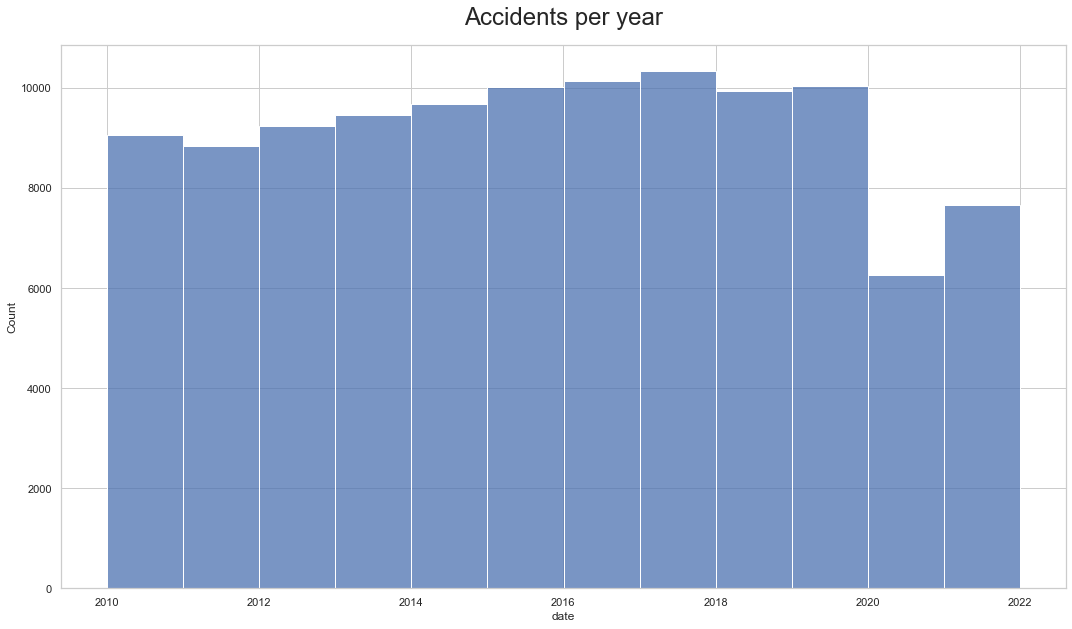

In [119]:
sns.histplot(x=data.date, bins=12);
plt.title("Accidents per year", fontsize=24, pad=20);

Accidents seem pretty evenly distributed over time. We can see a tip in the first part of 2020. Surely it must be related to the COVID-19 pandemic. Lets dive deeper into the data we have.

## Accidents by district

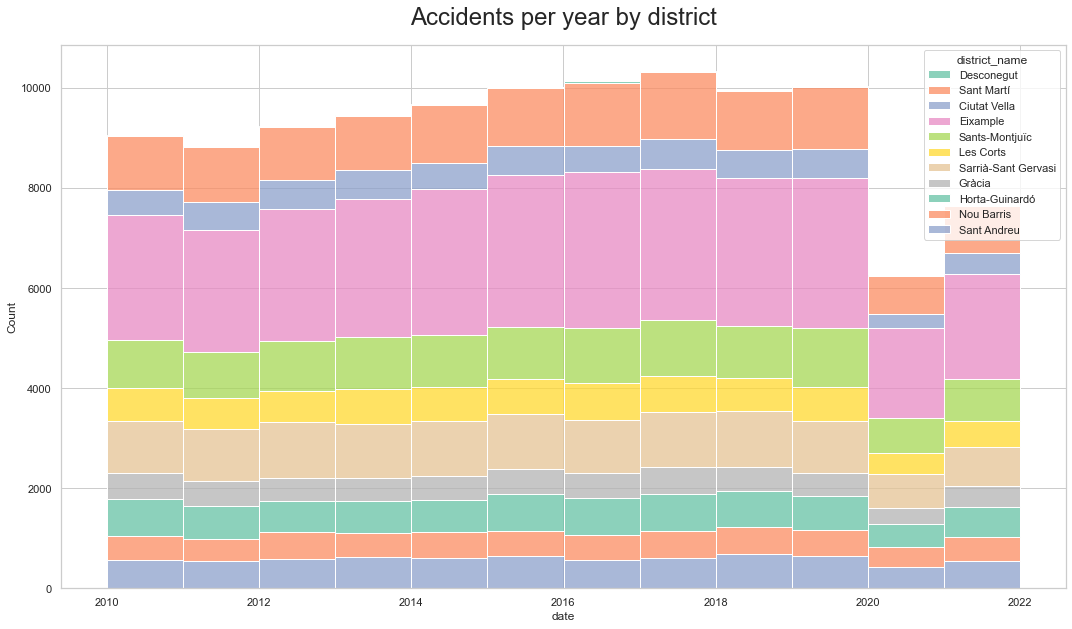

In [120]:
sns.histplot(data=data, x="date", hue="district_name", multiple="stack", bins=12, palette='Set2');
plt.title("Accidents per year by district", fontsize=24, pad=20);

Looks like l'Eixample is the area with most incidents. Lets have a look at the incident type now.

## Accidents by incident type

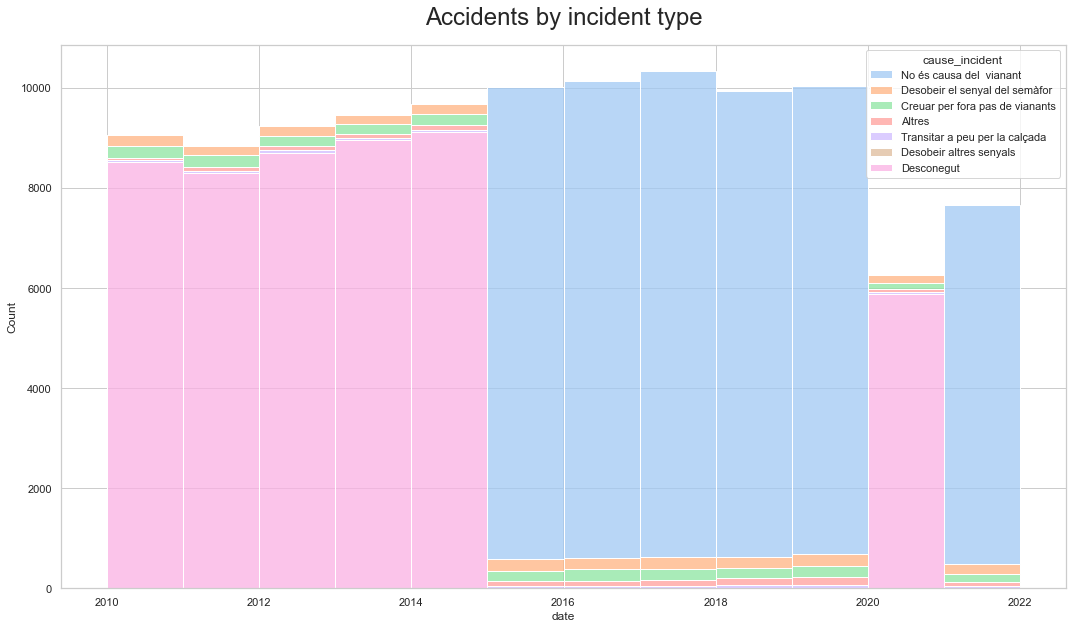

In [121]:
sns.histplot(data=data, x="date", hue="cause_incident", multiple="stack", bins=12, palette="pastel");
plt.title("Accidents by incident type", fontsize=24, pad=20);

This plot is suggesting there has been some sort of methodology change. Most fo the cases are being classified as "Desconegut" or "No és causa del vianant" for distinct periods of time (2010 - 2015, and 2020) and (2015 - 2019 and 2021) respectively.

Lets now explore how different variables behave across our data.

In [122]:
sns.scatterplot(y="rain_sum", x="temperature_2m_mean", size="n_victims", style="district_name", hue="cyrcadian", data = grouped);

In [ ]:
sns.catplot(data=grouped, x="cyrcadian", y="temperature_2m_mean")

In [ ]:
grouped.columns

Index(['Unnamed: 0', 'date', 'district_name', 'cyrcadian', 'n_deaths',
       'n_wounded_mild', 'n_wounded_severe', 'n_victims', 'n_vehicles',
       'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'sunrise', 'sunset', 'precipitation_sum',
       'rain_sum', 'precipitation_hours'],
      dtype='object')